<a href="https://colab.research.google.com/github/FernandoMV1/DS1--Python/blob/main/Proyecto_1_Cleaning_Data%2C_Data_analysis%2C_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 - Proceso de generación de valor por extración de datos


Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



# Importar Datos e Identificar variables a limpiar

In [ ]:
import numpy as np # Algebra lineal
import pandas as pd # Manipulación y procesamiento de datos

import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización
from google.colab import drive

In [ ]:
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

path = r'/content/drive/MyDrive/KodigoBootcamp/superstore'
files = os.listdir(path)
SUPERSTORE = pd.DataFrame()
for file in files:
  df_temp = pd.read_csv(path + "/"+ file, encoding = 'ISO-8859-1')
  df_temp['file_name'] = file
  SUPERSTORE = pd.concat([SUPERSTORE, df_temp], ignore_index=True)


In [ ]:
SUPERSTORE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          61550 non-null  int64  
 1   Order ID        61550 non-null  object 
 2   Order Date      61550 non-null  object 
 3   Ship Date       61550 non-null  object 
 4   Ship Mode       61550 non-null  object 
 5   Customer ID     61550 non-null  object 
 6   Customer Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Postal Code     11899 non-null  float64
 12  Market          61550 non-null  object 
 13  Region          61550 non-null  object 
 14  Product ID      61550 non-null  object 
 15  Category        61550 non-null  object 
 16  Sub-Category    61550 non-null  object 
 17  Product Name    61550 non-null 

In [ ]:
SUPERSTORE.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,file_name
0,5411,US-2014-128244,25-06-2014,1/7/2014,Standard Class,RD-19480,Rick Duston,Consumer,Buenos Aires,Buenos Aires,...,Office Supplies,Envelopes,"Jiffy Peel and Seal, Set of 50",24.012,3,0.4,-3.2280,0.77,Medium,Copie de superstore_dataset2011-2015-5.csv
1,10071,US-2014-110534,25-06-2014,29-06-2014,Standard Class,LR-16915,Lena Radford,Consumer,Registro,São Paulo,...,Office Supplies,Supplies,"Fiskars Scissors, High Speed",12.352,2,0.6,-14.5280,0.68,Medium,Copie de superstore_dataset2011-2015-5.csv
2,35951,CA-2014-159107,25-06-2014,27-06-2014,Second Class,KT-16480,Kean Thornton,Consumer,San Francisco,California,...,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.880,1,0.0,1.3536,0.39,Critical,Copie de superstore_dataset2011-2015-5.csv
3,9600,US-2014-125955,25-06-2014,30-06-2014,Standard Class,JW-15955,Joni Wasserman,Consumer,San Pedro Sula,Cortés,...,Office Supplies,Fasteners,"Stockwell Push Pins, Metal",11.280,2,0.4,-7.3600,0.33,Medium,Copie de superstore_dataset2011-2015-5.csv
4,35380,US-2014-151316,25-06-2014,1/7/2014,Standard Class,MC-17635,Matthew Clasen,Corporate,Decatur,Illinois,...,Office Supplies,Paper,Xerox 1971,10.272,3,0.2,3.2100,0.07,Medium,Copie de superstore_dataset2011-2015-5.csv
5,22493,IN-2011-60560,25-07-2011,30-07-2011,Standard Class,ML-18265,Muhammed Lee,Consumer,Bundaberg,Queensland,...,Technology,Copiers,"Hewlett Fax Machine, High-Speed",1431.540,5,0.1,413.4900,129.06,High,Copie de superstore_dataset2011-2015-5.csv
6,29214,IN-2011-54001,25-07-2011,31-07-2011,Standard Class,DK-13150,David Kendrick,Corporate,Maryborough,Queensland,...,Office Supplies,Appliances,"Hoover Refrigerator, White",1415.880,3,0.1,0.0000,61.79,Medium,Copie de superstore_dataset2011-2015-5.csv
7,46694,IR-2011-3170,25-07-2011,31-07-2011,Standard Class,FH-4365,Fred Hopkins,Corporate,Tehran,Tehran,...,Technology,Phones,"Samsung Smart Phone, with Caller ID",636.150,1,0.0,311.7000,41.29,Low,Copie de superstore_dataset2011-2015-5.csv
8,49285,BU-2011-5160,25-07-2011,1/8/2011,Standard Class,HR-4770,Hallie Redmond,Home Office,Sofia,Sofiya-Grad,...,Technology,Copiers,"Canon Copy Machine, High-Speed",260.340,1,0.0,46.8600,28.43,Low,Copie de superstore_dataset2011-2015-5.csv
9,33802,CA-2011-143917,25-07-2011,27-07-2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060,16.77,High,Copie de superstore_dataset2011-2015-5.csv


In [ ]:
SUPERSTORE.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,61550.000000,11899.000000,61550.000000,61550.000000,61550.000000,61550.000000,61550.000000
mean,25609.792851,55128.031599,248.323138,3.482924,0.143001,28.714501,26.616875
std,14813.424323,32085.202363,498.100427,2.281280,0.212477,175.320805,58.027798
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12802.250000,22801.000000,30.930000,2.000000,0.000000,0.000000,2.620000
50%,25552.500000,57103.000000,85.320000,3.000000,0.000000,9.180000,7.810000
75%,38468.750000,90008.000000,251.959000,5.000000,0.200000,36.810000,24.637500
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
SUPERSTORE.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,file_name
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
SUPERSTORE.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       49651
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
file_name             0
dtype: int64

In [ ]:
SUPERSTORE['Discount']

0        0.400
1        0.600
2        0.000
3        0.400
4        0.200
         ...  
61545    0.100
61546    0.200
61547    0.600
61548    0.002
61549    0.000
Name: Discount, Length: 61550, dtype: float64

In [ ]:
SUPERSTORE['Order Date']

0        25-06-2014
1        25-06-2014
2        25-06-2014
3        25-06-2014
4        25-06-2014
            ...    
61545    13-05-2014
61546    13-05-2014
61547    13-05-2014
61548    13-06-2011
61549    13-06-2011
Name: Order Date, Length: 61550, dtype: object

In [ ]:
SUPERSTORE['Ship Date']

0          1/7/2014
1        29-06-2014
2        27-06-2014
3        30-06-2014
4          1/7/2014
            ...    
61545    16-05-2014
61546    20-05-2014
61547    20-05-2014
61548    18-06-2011
61549    13-06-2011
Name: Ship Date, Length: 61550, dtype: object

# Voy a limpiar postal code, order date, ship date y los nombres de las columnas




# Limpieza de Datos

In [ ]:
s1 = SUPERSTORE.dropna(axis=0,how='any',inplace=True)
s1

In [ ]:
s2 = SUPERSTORE.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
SUPERSTORE

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
2,35951,CA-2014-159107,25-06-2014,27-06-2014,Second Class,KT-16480,Kean Thornton,Consumer,San Francisco,California,...,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.880,1,0.0,1.3536,0.39,Critical,Copie de superstore_dataset2011-2015-5.csv
4,35380,US-2014-151316,25-06-2014,1/7/2014,Standard Class,MC-17635,Matthew Clasen,Corporate,Decatur,Illinois,...,Office Supplies,Paper,Xerox 1971,10.272,3,0.2,3.2100,0.07,Medium,Copie de superstore_dataset2011-2015-5.csv
9,33802,CA-2011-143917,25-07-2011,27-07-2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060,16.77,High,Copie de superstore_dataset2011-2015-5.csv
12,33801,CA-2011-143917,25-07-2011,27-07-2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Office Supplies,Storage,"Fellowes Personal Hanging Folder Files, Navy",53.720,4,0.0,15.0416,5.53,High,Copie de superstore_dataset2011-2015-5.csv
13,33803,CA-2011-143917,25-07-2011,27-07-2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Furniture,Furnishings,Staples,77.920,8,0.0,34.2848,3.84,High,Copie de superstore_dataset2011-2015-5.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61535,37120,CA-2014-117632,13-05-2014,19-05-2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,California,...,Office Supplies,Binders,"DXL Angle-View Binders with Locking Rings, Black",19.168,4,0.2,6.4692,1.75,Medium,Copie de superstore_dataset2011-2015-2.csv
61536,37577,CA-2014-152226,13-05-2014,17-05-2014,Standard Class,JH-15910,Jonathan Howell,Consumer,Cincinnati,Ohio,...,Office Supplies,Labels,Avery 501,5.904,2,0.2,1.9926,1.40,High,Copie de superstore_dataset2011-2015-2.csv
61541,37964,CA-2014-122175,13-05-2014,15-05-2014,Second Class,CA-12775,Cynthia Arntzen,Consumer,Vineland,New Jersey,...,Office Supplies,Labels,Smead Alpha-Z Color-Coded Second Alphabetical ...,6.160,2,0.0,2.9568,0.70,High,Copie de superstore_dataset2011-2015-2.csv
61543,37118,CA-2014-117632,13-05-2014,19-05-2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,California,...,Office Supplies,Appliances,Hoover Commercial Soft Guard Upright Vacuum An...,7.770,1,0.0,2.0979,0.36,Medium,Copie de superstore_dataset2011-2015-2.csv


In [ ]:
SUPERSTORE['Order_Date'] = SUPERSTORE.Order_Date.apply(lambda x: x.replace('-','/'))

In [ ]:
SUPERSTORE['Ship_Date'] = SUPERSTORE.Order_Date.apply(lambda x: x.replace('-','/'))

In [ ]:
SUPERSTORE

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
2,35951,CA-2014-159107,25/06/2014,25/06/2014,Second Class,KT-16480,Kean Thornton,Consumer,San Francisco,California,...,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.880,1,0.0,1.3536,0.39,Critical,Copie de superstore_dataset2011-2015-5.csv
4,35380,US-2014-151316,25/06/2014,25/06/2014,Standard Class,MC-17635,Matthew Clasen,Corporate,Decatur,Illinois,...,Office Supplies,Paper,Xerox 1971,10.272,3,0.2,3.2100,0.07,Medium,Copie de superstore_dataset2011-2015-5.csv
9,33802,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060,16.77,High,Copie de superstore_dataset2011-2015-5.csv
12,33801,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Office Supplies,Storage,"Fellowes Personal Hanging Folder Files, Navy",53.720,4,0.0,15.0416,5.53,High,Copie de superstore_dataset2011-2015-5.csv
13,33803,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,...,Furniture,Furnishings,Staples,77.920,8,0.0,34.2848,3.84,High,Copie de superstore_dataset2011-2015-5.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61535,37120,CA-2014-117632,13/05/2014,13/05/2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,California,...,Office Supplies,Binders,"DXL Angle-View Binders with Locking Rings, Black",19.168,4,0.2,6.4692,1.75,Medium,Copie de superstore_dataset2011-2015-2.csv
61536,37577,CA-2014-152226,13/05/2014,13/05/2014,Standard Class,JH-15910,Jonathan Howell,Consumer,Cincinnati,Ohio,...,Office Supplies,Labels,Avery 501,5.904,2,0.2,1.9926,1.40,High,Copie de superstore_dataset2011-2015-2.csv
61541,37964,CA-2014-122175,13/05/2014,13/05/2014,Second Class,CA-12775,Cynthia Arntzen,Consumer,Vineland,New Jersey,...,Office Supplies,Labels,Smead Alpha-Z Color-Coded Second Alphabetical ...,6.160,2,0.0,2.9568,0.70,High,Copie de superstore_dataset2011-2015-2.csv
61543,37118,CA-2014-117632,13/05/2014,13/05/2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,California,...,Office Supplies,Appliances,Hoover Commercial Soft Guard Upright Vacuum An...,7.770,1,0.0,2.0979,0.36,Medium,Copie de superstore_dataset2011-2015-2.csv


# Creación de nueva base de datos en Google Drive

In [ ]:
path = '/content/drive/My Drive/output.csv' # Creamos archivo y abrimos para escribir /write
with open(path, 'w', encoding = 'utf-8-sig') as f:
  SUPERSTORE.to_csv(f)

# Explorando datos

Conectar a la nueva base de datos

In [ ]:
df = pd.read_csv('/content/drive/My Drive/output.csv')

In [ ]:
df

,Unnamed: 0,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
0,2,35951,CA-2014-159107,25/06/2014,25/06/2014,Second Class,KT-16480,Kean Thornton,Consumer,San Francisco,...,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.880,1,0.0,1.3536,0.39,Critical,Copie de superstore_dataset2011-2015-5.csv
1,4,35380,US-2014-151316,25/06/2014,25/06/2014,Standard Class,MC-17635,Matthew Clasen,Corporate,Decatur,...,Office Supplies,Paper,Xerox 1971,10.272,3,0.2,3.2100,0.07,Medium,Copie de superstore_dataset2011-2015-5.csv
2,9,33802,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060,16.77,High,Copie de superstore_dataset2011-2015-5.csv
3,12,33801,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Office Supplies,Storage,"Fellowes Personal Hanging Folder Files, Navy",53.720,4,0.0,15.0416,5.53,High,Copie de superstore_dataset2011-2015-5.csv
4,13,33803,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Furniture,Furnishings,Staples,77.920,8,0.0,34.2848,3.84,High,Copie de superstore_dataset2011-2015-5.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,61535,37120,CA-2014-117632,13/05/2014,13/05/2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,...,Office Supplies,Binders,"DXL Angle-View Binders with Locking Rings, Black",19.168,4,0.2,6.4692,1.75,Medium,Copie de superstore_dataset2011-2015-2.csv
11895,61536,37577,CA-2014-152226,13/05/2014,13/05/2014,Standard Class,JH-15910,Jonathan Howell,Consumer,Cincinnati,...,Office Supplies,Labels,Avery 501,5.904,2,0.2,1.9926,1.40,High,Copie de superstore_dataset2011-2015-2.csv
11896,61541,37964,CA-2014-122175,13/05/2014,13/05/2014,Second Class,CA-12775,Cynthia Arntzen,Consumer,Vineland,...,Office Supplies,Labels,Smead Alpha-Z Color-Coded Second Alphabetical ...,6.160,2,0.0,2.9568,0.70,High,Copie de superstore_dataset2011-2015-2.csv
11897,61543,37118,CA-2014-117632,13/05/2014,13/05/2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,...,Office Supplies,Appliances,Hoover Commercial Soft Guard Upright Vacuum An...,7.770,1,0.0,2.0979,0.36,Medium,Copie de superstore_dataset2011-2015-2.csv


In [ ]:
df.head(4)

,Unnamed: 0,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
0,2,35951,CA-2014-159107,25/06/2014,25/06/2014,Second Class,KT-16480,Kean Thornton,Consumer,San Francisco,...,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.880,1,0.0,1.3536,0.39,Critical,Copie de superstore_dataset2011-2015-5.csv
1,4,35380,US-2014-151316,25/06/2014,25/06/2014,Standard Class,MC-17635,Matthew Clasen,Corporate,Decatur,...,Office Supplies,Paper,Xerox 1971,10.272,3,0.2,3.2100,0.07,Medium,Copie de superstore_dataset2011-2015-5.csv
2,9,33802,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060,16.77,High,Copie de superstore_dataset2011-2015-5.csv
3,12,33801,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Office Supplies,Storage,"Fellowes Personal Hanging Folder Files, Navy",53.720,4,0.0,15.0416,5.53,High,Copie de superstore_dataset2011-2015-5.csv


In [ ]:
df.describe()

,Unnamed: 0,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Shipping_Cost
count,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000
mean,30376.042945,36303.688965,55128.031599,233.483160,3.785192,0.155879,29.248129,24.117965
std,17621.108151,2887.567535,32085.202363,658.934038,2.213685,0.206605,239.455372,60.127258
min,2.000000,31297.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,15208.000000,33810.500000,22801.000000,17.248000,2.000000,0.000000,1.773450,1.490000
50%,29757.000000,36300.000000,57103.000000,54.208000,3.000000,0.200000,8.556800,5.070000
75%,45520.500000,38794.000000,90008.000000,209.955000,5.000000,0.200000,29.144000,20.055000
max,61546.000000,41290.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11899 entries, 0 to 11898
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11899 non-null  int64  
 1   Row_ID          11899 non-null  int64  
 2   Order_ID        11899 non-null  object 
 3   Order_Date      11899 non-null  object 
 4   Ship_Date       11899 non-null  object 
 5   Ship_Mode       11899 non-null  object 
 6   Customer_ID     11899 non-null  object 
 7   Customer_Name   11899 non-null  object 
 8   Segment         11899 non-null  object 
 9   City            11899 non-null  object 
 10  State           11899 non-null  object 
 11  Country         11899 non-null  object 
 12  Postal_Code     11899 non-null  float64
 13  Market          11899 non-null  object 
 14  Region          11899 non-null  object 
 15  Product_ID      11899 non-null  object 
 16  Category        11899 non-null  object 
 17  Sub-Category    11899 non-null 

In [ ]:
df.columns

Index(['Unnamed: 0', 'Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date',
       'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State',
       'Country', 'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'file_name'],
      dtype='object')

In [ ]:
df.shape

(11899, 26)

# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



In [ ]:
df

,Unnamed: 0,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
0,2,35951,CA-2014-159107,25/06/2014,25/06/2014,Second Class,KT-16480,Kean Thornton,Consumer,San Francisco,...,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.880,1,0.0,1.3536,0.39,Critical,Copie de superstore_dataset2011-2015-5.csv
1,4,35380,US-2014-151316,25/06/2014,25/06/2014,Standard Class,MC-17635,Matthew Clasen,Corporate,Decatur,...,Office Supplies,Paper,Xerox 1971,10.272,3,0.2,3.2100,0.07,Medium,Copie de superstore_dataset2011-2015-5.csv
2,9,33802,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060,16.77,High,Copie de superstore_dataset2011-2015-5.csv
3,12,33801,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Office Supplies,Storage,"Fellowes Personal Hanging Folder Files, Navy",53.720,4,0.0,15.0416,5.53,High,Copie de superstore_dataset2011-2015-5.csv
4,13,33803,CA-2011-143917,25/07/2011,25/07/2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,...,Furniture,Furnishings,Staples,77.920,8,0.0,34.2848,3.84,High,Copie de superstore_dataset2011-2015-5.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,61535,37120,CA-2014-117632,13/05/2014,13/05/2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,...,Office Supplies,Binders,"DXL Angle-View Binders with Locking Rings, Black",19.168,4,0.2,6.4692,1.75,Medium,Copie de superstore_dataset2011-2015-2.csv
11895,61536,37577,CA-2014-152226,13/05/2014,13/05/2014,Standard Class,JH-15910,Jonathan Howell,Consumer,Cincinnati,...,Office Supplies,Labels,Avery 501,5.904,2,0.2,1.9926,1.40,High,Copie de superstore_dataset2011-2015-2.csv
11896,61541,37964,CA-2014-122175,13/05/2014,13/05/2014,Second Class,CA-12775,Cynthia Arntzen,Consumer,Vineland,...,Office Supplies,Labels,Smead Alpha-Z Color-Coded Second Alphabetical ...,6.160,2,0.0,2.9568,0.70,High,Copie de superstore_dataset2011-2015-2.csv
11897,61543,37118,CA-2014-117632,13/05/2014,13/05/2014,Standard Class,CS-12175,Charles Sheldon,Corporate,San Francisco,...,Office Supplies,Appliances,Hoover Commercial Soft Guard Upright Vacuum An...,7.770,1,0.0,2.0979,0.36,Medium,Copie de superstore_dataset2011-2015-2.csv


#Pregunta 1: ¿Cuál es el rendimiento de las diferentes regiones geográficas de la tienda?¿Cómo afectan los descuentos?¿Que relación hay con los productos mas vendidos?

In [ ]:
df['Region'].value_counts()

West       3813
East       3411
Central    2741
South      1934
Name: Region, dtype: int64

In [ ]:
ventas_west = df.loc[df['Region'] == 'West']
suma_ventas_west = ventas_west['Sales'].sum()
suma_ventas_west

861653.9635

In [ ]:
ventas_central = df.loc[df['Region'] == 'Central']
suma_ventas_central = ventas_central['Sales'].sum()
suma_ventas_central

591293.852

In [ ]:
ventas_south = df.loc[df['Region'] == 'South']
suma_ventas_south = ventas_south['Sales'].sum()
suma_ventas_south

477328.97250000003

In [ ]:
ventas_east = df.loc[df['Region'] == 'East']
suma_ventas_east = ventas_east['Sales'].sum()
suma_ventas_east

847939.3319999999

In [ ]:
ventas_por_region = df.groupby('Region')['Sales'].sum().reset_index()
ventas_por_region


,Region,Sales
0,Central,591293.8520
1,East,847939.3320
2,South,477328.9725
3,West,861653.9635


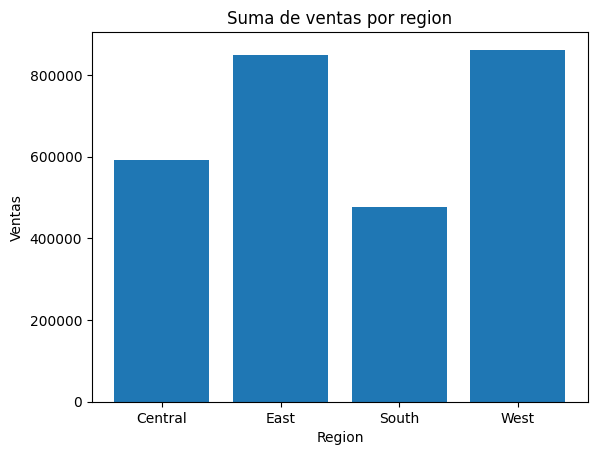

In [ ]:
plt.bar(ventas_por_region['Region'], ventas_por_region['Sales'])
plt.xlabel('Region')
plt.ylabel('Ventas')
plt.title('Suma de ventas por region')
plt.show()

In [ ]:
descuentos_por_region = df.groupby('Region')['Discount'].mean().reset_index()
descuentos_por_region

,Region,Discount
0,Central,0.242889
1,East,0.145500
2,South,0.145967
3,West,0.107645


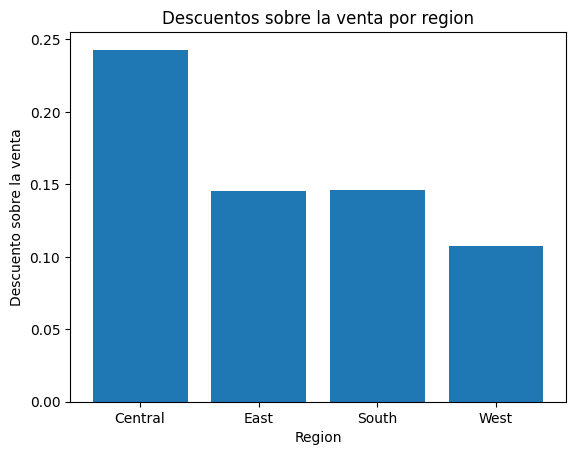

In [ ]:
plt.bar(descuentos_por_region['Region'], descuentos_por_region['Discount'])
plt.xlabel('Region')
plt.ylabel('Descuento sobre la venta')
plt.title('Descuentos sobre la venta por region')
plt.show()

In [ ]:
ventas_por_region_categoria = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
categoria_mas_vendida_por_region = ventas_por_region_categoria.loc[ventas_por_region_categoria.groupby('Region')['Sales'].idxmax()]
categoria_mas_vendida_por_region

,Region,Category,Sales
1,Central,Office Supplies,208008.9370
5,East,Technology,336725.1050
8,South,Technology,187163.4230
9,West,Furniture,300685.1675


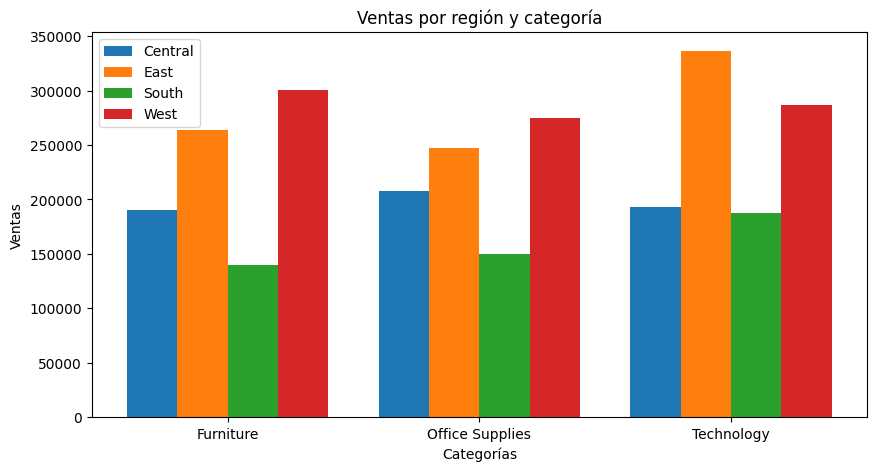

In [ ]:
ventas_region_categoria = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()
categorias = ventas_region_categoria.columns.to_list()
regiones = ventas_region_categoria.index.to_list()
ventas = np.array(ventas_region_categoria)
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.2
for i, region in enumerate(regiones):
    x = np.arange(len(categorias)) + i * bar_width
    ax.bar(x, ventas[i], width=bar_width, label=region)
ax.set_xticks(np.arange(len(categorias)) + bar_width * (len(regiones) - 1) / 2)
ax.set_xticklabels(categorias)
ax.legend()
ax.set_xlabel('Categorías')
ax.set_ylabel('Ventas')
ax.set_title('Ventas por región y categoría')
plt.show()


##¿Cuál es la relación entre la cantidad de productos en una categoria y las ventas que genera?

In [ ]:
cantidad_por_categoria = df.groupby('Category')['Quantity'].sum().reset_index()
cantidad_por_categoria

,Category,Quantity
0,Furniture,9553
1,Office Supplies,27265
2,Technology,8222


In [ ]:
ventas_por_categoria = df.groupby('Category')['Sales'].sum()
ventas_por_categoria

Category
Furniture           894808.393
Office Supplies     880027.143
Technology         1003380.584
Name: Sales, dtype: float64

<Figure size 800x600 with 0 Axes>

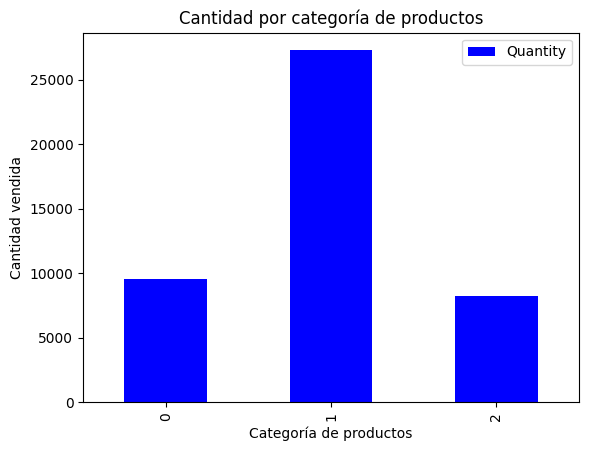

In [ ]:
plt.figure(figsize=(8, 6))
cantidad_por_categoria.plot(kind='bar', color='blue')
plt.title('Cantidad por categoría de productos')
plt.xlabel('Categoría de productos')
plt.ylabel('Cantidad vendida')
plt.show()

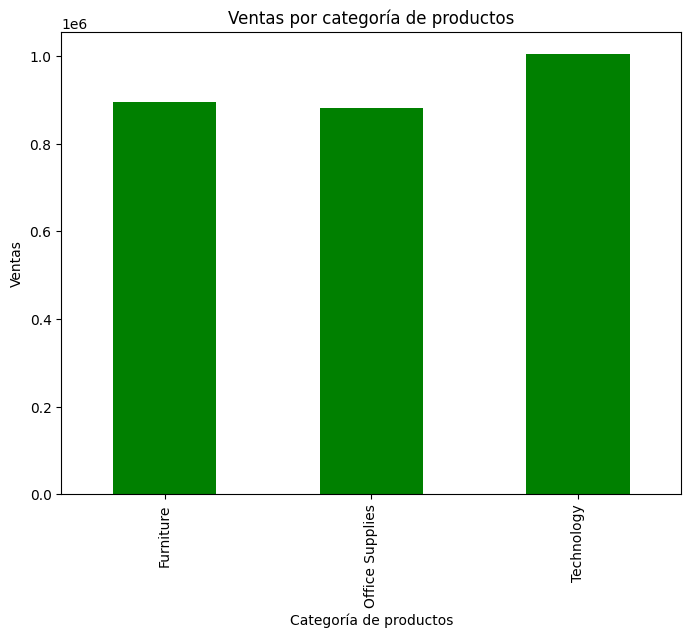

In [ ]:
plt.figure(figsize=(8, 6))
ventas_por_categoria.plot(kind='bar', color='green')
plt.title('Ventas por categoría de productos')
plt.xlabel('Categoría de productos')
plt.ylabel('Ventas')
plt.show()

In [ ]:
ventas_por_producto = df.groupby(['Category', 'Product_Name'])['Sales'].sum().reset_index()
ventas_por_producto

,Category,Product_Name,Sales
0,Furniture,12-1/2 Diameter Round Wall Clock,591.408
1,Furniture,24-Hour Round Wall Clock,527.472
2,Furniture,36X48 HARDFLOOR CHAIRMAT,386.032
3,Furniture,3M Hangers With Command Adhesive,108.040
4,Furniture,3M Polarizing Light Filter Sleeves,216.340
...,...,...,...
1837,Technology,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
1838,Technology,iOttie HLCRIO102 Car Mount,359.820
1839,Technology,iOttie XL Car Mount,223.888
1840,Technology,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [ ]:
indice_producto = ventas_por_producto.groupby(['Category'])['Sales'].transform(max) == ventas_por_producto['Sales']
productos_mas_vendidos_por_categoria = ventas_por_producto[indice_producto]
productos_mas_vendidos_por_categoria

,Category,Product_Name,Sales
206,Furniture,HON 5400 Series Task Chairs for Big and Tall,29861.748
773,Office Supplies,Fellowes PB500 Electric Punch Plastic Comb Bin...,42959.462
1486,Technology,Canon imageCLASS 2200 Advanced Copier,72099.794


In [ ]:
(72099.794*100)/1003380.584

7.185687579539609

# Conclusiones

**¿Cuál es el rendimiento de las diferentes regiones geográficas de la tienda? ¿Cómo afectan los descuentos? ¿Qué relación hay con los productos más vendidos?** Al realizar el análisis, pudimos observar que las regiones Este y Oeste son donde los productos se venden más. En general, las ventas por región superan el medio millón de dólares, a excepción de la región Sur que está en el límite. También podemos ver que el uso de descuentos no afecta significativamente la compra de productos. Por ejemplo, la región central es donde se aplican los descuentos más altos, llegando al 24%, y es la tercera región menos efectiva de las cuatro. Con el último gráfico podemos ver que la región Oeste vende de manera más equilibrada todos los productos, mientras que la región Este vende principalmente productos de tecnología. Es importante conocer esta información para entender a nuestro público y aprovecharlo al máximo.

**¿Cuál es la relación entre la cantidad de productos en una categoría y las ventas que genera?** Al realizar el análisis, primero observamos que la cantidad de productos en una categoría no afecta significativamente el número de ventas. Por ejemplo, la categoría de tecnología es la que tiene menos productos, sin embargo, es la que genera más ventas. Luego, nos enfocamos en analizar cuál es el producto más vendido para cada categoría. En tecnología, un producto de los 8,222 disponibles genera un poco más del 7% de las ventas totales. Esto significa que la mayoría de las ventas se concentra en unos pocos productos muy populares o virales. Este análisis se puede respaldar con la conocida regla del 80/20, donde el 20% de los productos generan el 80% de las ganancias.